### Undirected Graphs

In [1]:
import copy

def undir_single_fire(graph,config,vertex):
    # takes in
        # the base graph (with the sink as the highest labeled vertex)
        # the current configuration of chips (as a list/vector, with as many entries as non-sink vertices)
        # a vertex to fire

    q = len(config)
    new_config = []
    for v in config:
        new_config.append(copy.deepcopy(v))
    
    # if vertex is the sink, return none -- we might want to change this in the future to allow the sink to fire
    if vertex >= q:
        return None
        
    # if not the sink, if the vertex has enough chips to fire, fire
    elif new_config[vertex] >= graph.degree(vertex):
        new_config[vertex] = new_config[vertex] - graph.degree(vertex)
        for neighbor in graph.neighbors(vertex):
            # print(f"neighbor: {neighbor}")
            if neighbor == q:
                pass
            else:
                new_config[neighbor] = new_config[neighbor]+1
        return new_config

    # if not the sink but not enough chips to fire, return none
    else:
        return None

# test
# graph = Graph([[0,1],[1,2],[2,3],[3,0],[0,2]])
# graph.show()
# config = [2,2,3]
# fire_0 = undir_single_fire(graph,config,0)
# print(fire_0)
# fire_1 = undir_single_fire(graph,config,1)
# print(fire_1)
# fire_2 = undir_single_fire(graph,config,2)
# print(fire_2)
# fire_3 = undir_single_fire(graph,config,3)
# print(fire_3)

In [2]:
def check_nonneg(config):
    nonneg = True
    for v in config:
        if v < 0:
            nonneg = False
            return nonneg
        else:
            pass
    return nonneg

def undir_get_firable(graph,config):
    firable = []
    for vertex in range(len(config)):
        fire_result = undir_single_fire(graph,config,vertex)
        if fire_result == None:
            pass
        elif check_nonneg(fire_result) == True:
            firable.append(vertex)
        else:
            pass
    return firable

# test
# graph = Graph([[0,1],[1,2],[2,3],[3,0],[0,2]])
# graph.show()
# config = [2,2,3]
# print(undir_get_firable(graph,config))

In [3]:
def undir_get_reachable(graph,config):
    reachableConfigs = [config]  # Start with the original config in the list
    new_configs_found = True

    while new_configs_found:
        new_configs_found = False  # Assume no new configs found unless proven otherwise
        # print("reset new configs to false")

        # Loop through each configuration in reachableConfigs
        for current_config in reachableConfigs[:]:  # Use a slice to avoid modifying list while iterating
            # Get all firable vertices from the current configuration
            firable = undir_get_firable(graph,current_config)
            # print(f"firable for {current_config}: {firable}")

            # Fire each vertex
            for vertex in firable:
                # print(f"firing {vertex}")
                # Apply undir_single_fire to get a new configuration
                new_config = undir_single_fire(graph,current_config, vertex)
                # print(f"result {new_config}")

                # If new_config is valid and not already in reachableConfigs, add it
                if new_config is not None and new_config not in reachableConfigs:
                    # print("result is valid and new; adding to reachables")
                    reachableConfigs.append(new_config)
                    new_configs_found = True  # We found a new config, so continue the loop
                    # print("reset new configs to true")

        # Stop when no new configurations were added in the last round
    return reachableConfigs

# test
# graph = Graph([[0,1],[1,2],[2,3],[3,0],[0,2]])
# graph.show()
# config = [2,2,3]
# reachable = undir_get_reachable(graph,config)
# for configuration in reachable:
#     print(configuration)

In [4]:
def undir_get_edges(graph,config):
# get all the reachable configurations from config
    reachableConfigs = undir_get_reachable(graph,config)
    # print(f"reachable configs: {reachableConfigs}")
# get the number of reachable configurations
    numVertices = len(reachableConfigs)
    edges = []
# for every pair of reachable configurations (i and j) and every two pairs of chips (k and ell),
# check if configuration j is equal to configuration i but with chips k and ell fired
    for i in range(numVertices):
        reached = reachableConfigs[i]
        # print(f"now checking configuration {reached}")
        check_vertices = undir_get_firable(graph,reached)
        # print(f"firable: {check_vertices}")
        for vertex in check_vertices:
            firedConfig = undir_single_fire(graph,reached,vertex)
            # print(f"firing {vertex} gives: {firedConfig}")
            if firedConfig in reachableConfigs and [i,reachableConfigs.index(firedConfig)] not in edges:
                edges.append([i,reachableConfigs.index(firedConfig)])
                # print(f"adding edge [{i},{reachableConfigs.index(firedConfig)}]")
            else:
                pass
    return edges



def edgeToHasse(edges):
    graph = DiGraph(edges)
    poset = Poset(graph)
    return poset

def getPosetInfo(poset):
    print(f"check gradedness (should be true by global confluence): {poset.is_graded()}")
    print(f"total states: {poset.cardinality()}")
    print(f"total relations (not counting multiplicity for config.s reached by multiple different firings): {poset.relations_number()}")
    print(f"length of maximal chains: {poset.rank()}")
    # print(f"number of paths to stable: {len(poset.maximal_chains())}")

# test
# graph = Graph([[0,1],[1,2],[2,3],[0,3],[0,2]])
# config = [2,2,3]
# edges = undir_get_edges(graph,config)
# poset_digraph = DiGraph(edges)

# reachable = undir_get_reachable(graph,config)
# i = 0
# vertex_dict = {}
# for configuration in reachable:
# #     print(f"vertex {i}: {configuration}")
#     vertex_dict[i] = str(configuration)
#     i = i+1
# # print(vertex_dict)
# poset_digraph.relabel(vertex_dict)

# undir_poset = edgeToHasse(poset_digraph)

# graph.relabel({3:'q'})
# graph.show()
# getPosetInfo(undir_poset)
# undir_poset.show()

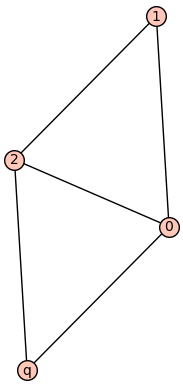

check gradedness (should be true by global confluence): True
total states: 11
total relations (not counting multiplicity for config.s reached by multiple different firings): 60
length of maximal chains: 7


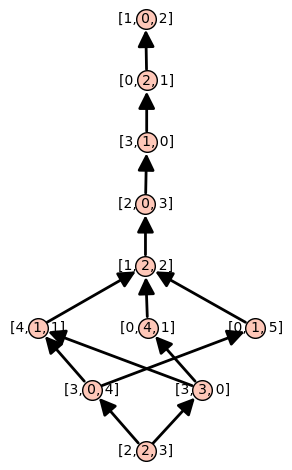

In [5]:
def undir_show_poset(graph,config):
    edges = undir_get_edges(graph,config)
    poset_digraph = DiGraph(edges)
    
    reachable = undir_get_reachable(graph,config)
    i = 0
    vertex_dict = {}
    for configuration in reachable:
    #     print(f"vertex {i}: {configuration}")
        vertex_dict[i] = str(configuration)
        i = i+1
    # print(vertex_dict)
    poset_digraph.relabel(vertex_dict)
    
    undir_poset = edgeToHasse(poset_digraph)

    q = graph.order() - 1
    
    graph.relabel({q:'q'})
    graph.show()
    getPosetInfo(undir_poset)
    undir_poset.show()




### This is the format you want to follow to test other graphs/configurations. ###
### There is an analagous function for digraphs in the next section. ###

graph = Graph([[0,1],[1,2],[2,3],[0,3],[0,2]])
config = [2,2,3]
undir_show_poset(graph,config)

### Directed Graphs

In [6]:
def dir_single_fire(digraph,config,vertex):
    # takes in
        # the base graph (with the sink as the highest labeled vertex)
        # the current configuration of chips (as a list/vector, with as many entries as non-sink vertices)
        # a vertex to fire

    q = len(config)
    new_config = []
    for v in config:
        new_config.append(copy.deepcopy(v))
    
    # if vertex is the sink, return none -- we might want to change this in the future to allow the sink to fire
    if vertex >= q:
        return None
        
    # if not the sink, if the vertex has enough chips to fire, fire
    elif new_config[vertex] >= digraph.out_degree(vertex):
        new_config[vertex] = new_config[vertex] - digraph.out_degree(vertex)
        for neighbor in digraph.neighbors_out(vertex):
            # print(f"neighbor: {neighbor}")
            if neighbor == q:
                pass
            else:
                new_config[neighbor] = new_config[neighbor]+1
        return new_config

    # if not the sink but not enough chips to fire, return none
    else:
        return None

# test
# digraph = DiGraph([[0,1],[1,2],[2,3],[0,3],[0,2]])
# digraph.show()
# config = [2,2,3]
# fire_01 = dir_single_fire(digraph,config,0)
# print(fire_01)
# fire_11 = dir_single_fire(digraph,config,1)
# print(fire_11)
# fire_21 = dir_single_fire(digraph,config,2)
# print(fire_21)
# fire_31 = dir_single_fire(digraph,config,3)
# print(fire_31)

In [7]:
def dir_get_firable(digraph,config):
    firable = []
    for vertex in range(len(config)):
        fire_result = dir_single_fire(digraph,config,vertex)
        if fire_result == None:
            pass
        elif check_nonneg(fire_result) == True:
            firable.append(vertex)
        else:
            pass
    return firable



# test
# digraph = DiGraph([[0,1],[1,2],[2,3],[0,3],[0,2]])
# digraph.show()
# config = [2,2,3]
# print(dir_get_firable(digraph,config))

In [8]:
def dir_get_reachable(digraph,config):
    reachableConfigs = [config]  # Start with the original config in the list
    new_configs_found = True

    while new_configs_found:
        new_configs_found = False  # Assume no new configs found unless proven otherwise
        # print("reset new configs to false")

        # Loop through each configuration in reachableConfigs
        for current_config in reachableConfigs[:]:  # Use a slice to avoid modifying list while iterating
            # Get all firable vertices from the current configuration
            firable = dir_get_firable(digraph,current_config)
            # print(f"firable for {current_config}: {firable}")

            # Fire each vertex
            for vertex in firable:
                # print(f"firing {vertex}")
                # Apply undir_single_fire to get a new configuration
                new_config = dir_single_fire(digraph,current_config, vertex)
                # print(f"result {new_config}")

                # If new_config is valid and not already in reachableConfigs, add it
                if new_config is not None and new_config not in reachableConfigs:
                    # print("result is valid and new; adding to reachables")
                    reachableConfigs.append(new_config)
                    new_configs_found = True  # We found a new config, so continue the loop
                    # print("reset new configs to true")

        # Stop when no new configurations were added in the last round
    return reachableConfigs

# test
# digraph = DiGraph([[0,1],[1,2],[2,3],[0,3],[0,2]])
# digraph.show()
# config = [2,2,3]
# reachable = dir_get_reachable(digraph,config)
# for configuration in reachable:
#     print(configuration)

In [9]:
def dir_get_edges(digraph,config):
# get all the reachable configurations from config
    reachableConfigs = dir_get_reachable(digraph,config)
    # print(f"reachable configs: {reachableConfigs}")
# get the number of reachable configurations
    numVertices = len(reachableConfigs)
    edges = []
# for every pair of reachable configurations (i and j) and every two pairs of chips (k and ell),
# check if configuration j is equal to configuration i but with chips k and ell fired
    for i in range(numVertices):
        reached = reachableConfigs[i]
        # print(f"now checking configuration {reached}")
        check_vertices = dir_get_firable(digraph,reached)
        # print(f"firable: {check_vertices}")
        for vertex in check_vertices:
            firedConfig = dir_single_fire(digraph,reached,vertex)
            # print(f"firing {vertex} gives: {firedConfig}")
            if firedConfig in reachableConfigs and [i,reachableConfigs.index(firedConfig)] not in edges:
                edges.append([i,reachableConfigs.index(firedConfig)])
                # print(f"adding edge [{i},{reachableConfigs.index(firedConfig)}]")
            else:
                pass
    return edges

# test
# digraph = DiGraph([[0,1],[1,2],[2,3],[0,3],[0,2]])
# config = [2,2,3]
# edges = dir_get_edges(digraph,config)
# poset_digraph = DiGraph(edges)

# reachable = dir_get_reachable(digraph,config)
# i = 0
# vertex_dict = {}
# for configuration in reachable:
# #     print(f"vertex {i}: {configuration}")
#     vertex_dict[i] = str(configuration)
#     i = i+1
# # print(vertex_dict)
# poset_digraph.relabel(vertex_dict)

# dir_poset = edgeToHasse(poset_digraph)

# digraph.relabel({3:'q'})
# digraph.show()
# getPosetInfo(dir_poset)
# dir_poset.show()

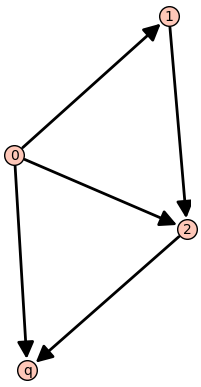

check gradedness (should be true by global confluence): True
total states: 15
total relations (not counting multiplicity for config.s reached by multiple different firings): 98
length of maximal chains: 7


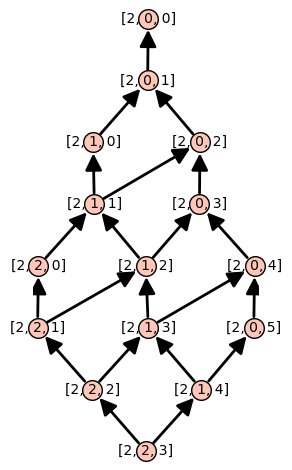

In [10]:
def dir_show_poset(digraph,config):
    edges = dir_get_edges(digraph,config)
    poset_digraph = DiGraph(edges)
    
    reachable = dir_get_reachable(digraph,config)
    i = 0
    vertex_dict = {}
    for configuration in reachable:
    #     print(f"vertex {i}: {configuration}")
        vertex_dict[i] = str(configuration)
        i = i+1
    # print(vertex_dict)
    poset_digraph.relabel(vertex_dict)
    
    dir_poset = edgeToHasse(poset_digraph)

    q = digraph.order() - 1
    
    digraph.relabel({q:'q'})
    digraph.show()
    getPosetInfo(dir_poset)
    dir_poset.show()





### This is the format you want to follow to test other graphs/configurations. ###
### There is an analagous function for undirected graphs in the last section. ###

digraph = DiGraph([[0,1],[1,2],[2,3],[0,3],[0,2]])
config = [2,2,3]
dir_show_poset(digraph,config)